In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv('mymoviedb.csv',lineterminator = '\n')

In [66]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [67]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB
None


In [68]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [69]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9822    False
9823    False
9824    False
9825    False
9826    False
Length: 9827, dtype: bool

In [70]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [71]:
#Release date column needs to be transformed into date format
#Overview,PosterURL and Originial Language is not usefull in analysis so dropping them

In [72]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])

In [73]:
print(df['Release_Date'].dtypes)

datetime64[ns]


In [74]:
#here we need only year so we are converting that column into year only
df['Release_Date']=df['Release_Date'].dt.year

In [75]:
#printing Year of release date column for show pleasure
df['Release_Date']

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Date, Length: 9827, dtype: int32

In [76]:
#dropping some coloumns that are not usefull for the analysis purpose
# Here we are making list of columns we are going to delete
col=['Overview','Original_Language','Poster_Url']
df.drop(col,axis=1,inplace = True)

In [77]:
#printing dataset to make sure columns were deleted
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [78]:
def catigorize_col(df, col, labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [79]:
labels = ['Not popular', 'Below Average', 'Average', 'Popular']
df = catigorize_col(df, 'Vote_Average', labels)

In [80]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,Popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,Not popular,Horror
9824,2016,The Offering,13.355,94,Not popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Average,"Music, Drama, History"


In [81]:
#now we will count that how many movies are popular,below average,average,not popular
df['Vote_Average'].value_counts()

Vote_Average
Not popular      2467
Popular          2450
Average          2412
Below Average    2398
Name: count, dtype: int64

In [82]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [83]:
df['Genre'] = df['Genre'].astype(str).str.split(', ')
df = df.explode('Genre').reset_index(drop=True)

In [84]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery
...,...,...,...,...,...,...
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama


In [85]:
#casting category into column
df['Genre']=df['Genre'].astype('category')

In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB
None


In [89]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# what is the most frequent Genre of movies released on Netflix?


In [90]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [92]:
sns.set_style('whitegrid')

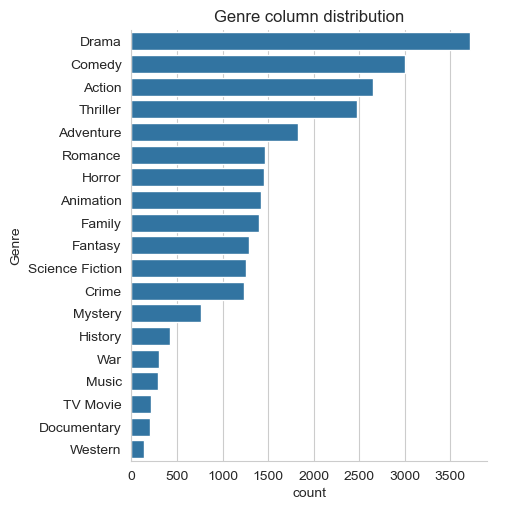

In [94]:
sns.catplot(y='Genre',data=df,kind='count',
            order = df['Genre'].value_counts().index)
plt.title('Genre column distribution')
plt.show()

# Which has the highest votes in vote avg column?

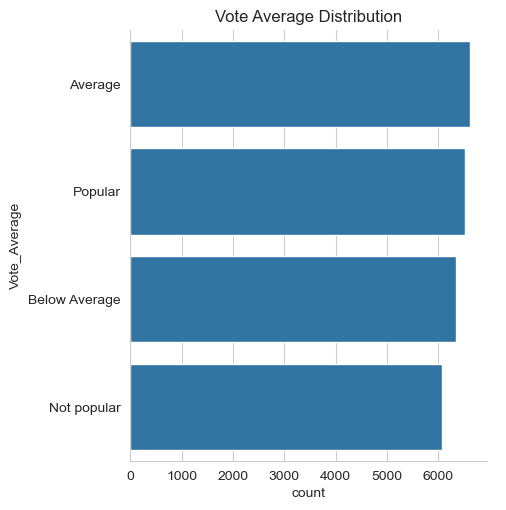

In [95]:
sns.catplot(y='Vote_Average',data = df, kind = 'count',
           order = df['Vote_Average'].value_counts().index)

plt.title('Vote Average Distribution')
plt.show()

# What movie got the highest popularity?what was it's Gnere?

In [96]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# What movie got the lowest popularity?what was it's Gnere?

In [99]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


# Which year has the most filmmed movies?

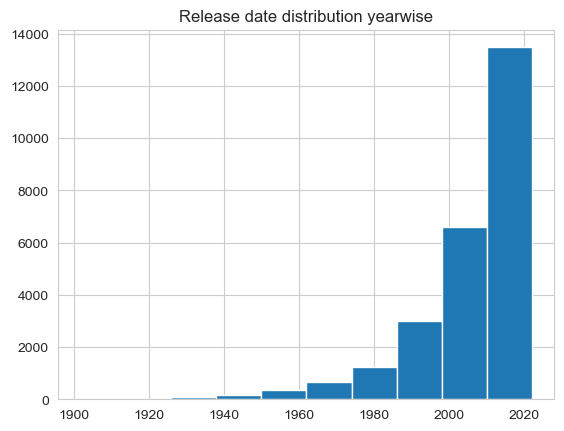

In [100]:
df['Release_Date'].hist()
plt.title('Release date distribution yearwise')
plt.show()

Conclusion
1.what is the most frequent Genre of movies released on Netflix?
Drama genre is the most frequent genre in dataset and has appeared more than 14%  of the times among 9 other genre

2.Which has the highest votes in vote avg column
Popular is having the highest vote in avg column,Drama genre again has got the highest populrity

3.What movie got the highest popularity?what was it's Genre?
SpiderMan has got the highest popularity in dataset and it's genre is Action,Adventure and Science-Fiction

4.What movie got the lowest popularity?what was it's Gnere?
The United States vs. Billie Holiday  and Threads has lowest popularity and there genre is music,science-fiction,Drama,History,War

5.Which year has the most filmmed movies?
2020 is most filmed year in dataset